In [1]:
#plotting real-time arduino data
import serial
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv
import heartpy as hp
import matplotlib.pyplot as plt

ser=serial.Serial('COM11', 115200)
time.sleep(2)
ser.flushInput()
sample_rate= 300 

data=[]
for i in range (200):
    b=ser.readline()
    string_n=b.decode()
    string=string_n.rstrip()
    flt=float(string)
    #print(flt)
    data.append(flt)
    time.sleep(0.1)
ser.close()

filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

plt.figure(figsize=(12,4))
plt.plot(data, label = 'original signal')
plt.plot(filtered, alpha=0.5, label = 'filtered signal')
plt.legend()

plt.show()

<Figure size 1200x400 with 1 Axes>

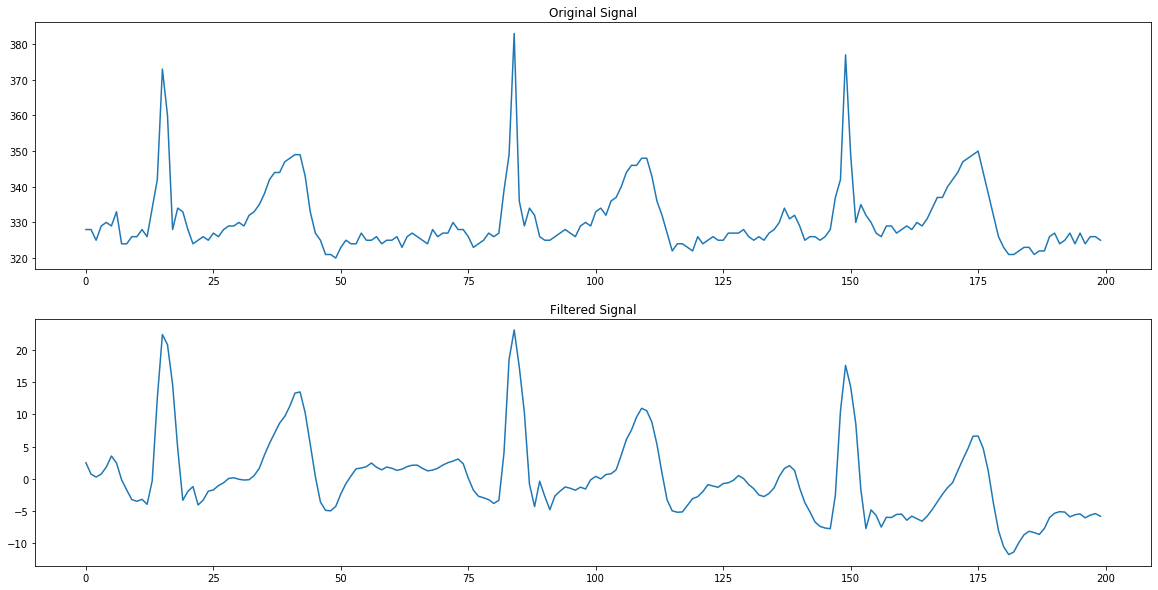

In [2]:
import scipy
import heartpy as hp
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import heartpy
#rawdata = hp.get_data('ECG2.csv')
signal = filtered
fs = 350

filter1= heartpy.filtering.smooth_signal(signal, sample_rate = 60, window_length=None, polyorder=3)


#baseline wander code
import numpy as np
import pandas as pd
import pylab
from scipy import signal
import matplotlib.pyplot as plt

# Butterworth Filter
def butter_highpass(cutoff, fs, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(filtered5, cutoff, fs, order=6):
    b, a = butter_highpass(cutoff, fs, order=order)
# b = numerator coefficient vector of the filter
# a = denominator coefficient vector of the filter
    y = signal.filtfilt(b, a, filtered5)
# this function applies a linear digital filter twice, once forward and once backwards
    return y

fps = 30 # arbitrary sampling frequency

# Determine an ideal cutoff frequency as the second argument
filter2 = butter_highpass_filter(filter1,0.1,fps)

from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a

def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a

def highpass(data, fs, order=5):
    b,a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b,a,data)
    return x

def lowpass(data, fs, order =5):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z

def final_filter(data, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b, a, data)
    d, c = butter_lowpass(cutoff_low, fs, order = order)
    y = lfilter(d, c, x)
    f, e = notch_filter(powerline, 30)
    z = lfilter(f, e, y)    
    return x
    return y
    return z

signal = filter2
fs = 350

cutoff_high = 0.2
cutoff_low = 150
powerline = 60
order = 5

#print(signal)

conditioned_signal = final_filter(signal, fs, order)

hsignal = highpass(signal, fs, order)

lsignal = lowpass(signal, fs, order)


filter3=lsignal

filter4=heartpy.filtering.filter_signal(filter3, cutoff=0.2, sample_rate=350, order=5, filtertype='highpass', return_top=False)
scaled=(filter4*200)/10000
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(data)), data)
#pylab.xlim(2000,2500)

plt.title('Original Signal')
plt.subplot(212)


plt.plot(range(len(filter4)),filter4)
plt.title('Filtered Signal')
plt.show()

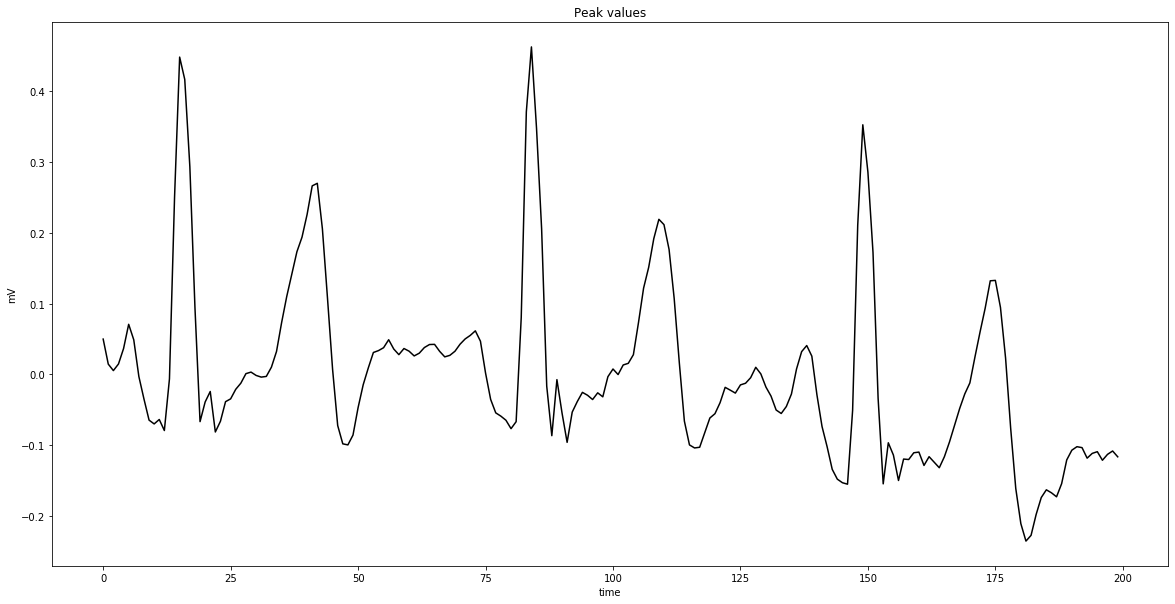

[] R Peaks
Normal R Range
[] T Peaks
Normal T Range


In [4]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import pylab
#printing R, P, and T peak values on the same graph
scaled=(filter4*200)/10000
x = scaled
Rpeaks, _= find_peaks(x, height=(.75,4), distance=70)
plt.figure(figsize=(20,10))
plt.plot(x,'black')
plt.plot(Rpeaks, x[Rpeaks], "o", color="blue")


Tpeaks, _= find_peaks(x, height=(0.5,1), distance=50)
plt.plot(Tpeaks, x[Tpeaks], "o", color = "red")


plt.title('Peak values')
plt.ylabel('mV')
plt.xlabel('time')
plt.show()
print( x[Rpeaks], 'R Peaks')

Rmax=x[Rpeaks]
if (Rmax<1).all():
    print ('Normal R Range')
    

print( x[Tpeaks], 'T Peaks')
Tmax=x[Tpeaks]
if (Tmax<0.2).all():
   print ('Normal T Range')